# question 2

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.io as sio
import sklearn
from sklearn import decomposition, manifold

In [143]:
data, label = sklearn.datasets.make_swiss_roll(n_samples=1000, noise=0.0, random_state=None)

In [144]:
data = pd.DataFrame(data)

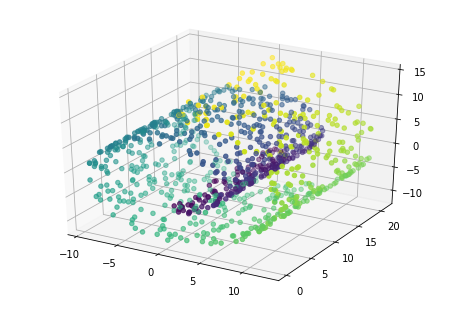

In [145]:
ax = Axes3D(plt.figure())
ax.scatter(data[0],data[1],data[2],c=label)
plt.show()

In [153]:
#question 1 pca to the data set to 2 parameters
pr_dict ={}
pr_dict['extension']= data
pr_dict['pca'] = pd.DataFrame(decomposition.PCA(n_components=2 ).fit_transform(data))
pr_dict['kpca'] = pd.DataFrame(decomposition.KernelPCA(n_components=2, kernel='rbf',gamma=0.03 ).fit_transform(data))


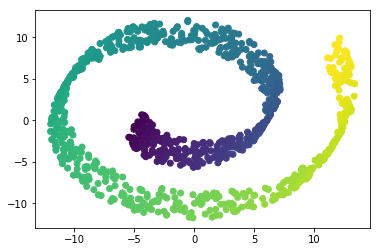

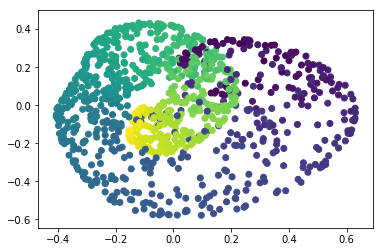

In [147]:
for key in pr_dict.keys():
    plt.scatter(pr_dict[key][0],pr_dict[key][1],c=label)
    plt.show()


we after iterating diferent gamma values $\gamma = \frac{1}{\sigma^2}$ we find that $\gamma = 0.03$ represents the data the best

In [113]:
# The idea is to unfold the data knowing how the data is build 
# 
data['arctan']= np.arctan(data[0]/data[2])*100
data['big_zed']= data[1]*100

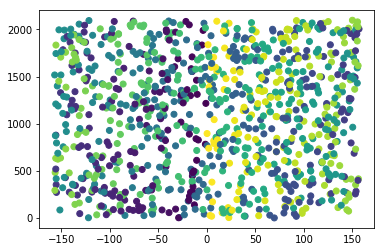

In [116]:
plt.scatter(data['arctan'],data['big_zed'],c=label)
plt.show()


In [128]:
#since we have told we can use any sklearn algohrimt we cheat and use isomap to unfold the data and then maximise the fetures 
# features to a biger dimention to make look the original fetures really small, we could also use some 
# transformation from x in R^n to phi(x) in R^m s.t m>>n 

cheat_iso = manifold.Isomap(n_components=2,n_neighbors=7).fit_transform(data)

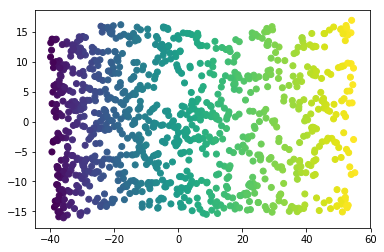

In [175]:

a= data.copy()
cheat_iso = manifold.Isomap(n_components=2,n_neighbors=7).fit_transform(data)
a[3]=cheat_iso.T[0]
a[4]=cheat_iso.T[1]
b= decomposition.PCA(n_components=2 ).fit_transform(a).T
plt.scatter(b[0],b[1],c=label)
plt.show()

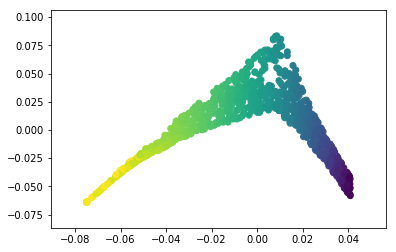

In [180]:
lle= manifold.LocallyLinearEmbedding(n_components=2,n_neighbors=7).fit_transform(data).T
plt.scatter(lle[0],lle[1],c=label)
plt.show()

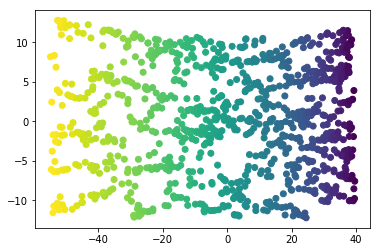

In [181]:
cheat_iso = manifold.Isomap(n_components=2,n_neighbors=7).fit_transform(data).T
plt.scatter(cheat_iso[0],cheat_iso[1],c=label)
plt.show()